# Test set predictions of best performing GIF models

Representative samples are shown in fig 3.

In [1]:
from common import colors, sbarlw, savefig

In [2]:
import os
os.chdir(os.path.join('..', '..'))
print(os.getcwd())

/home/efharkin/projects/raphegif/raphegif


In [3]:
import pickle
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from ezephys import pltools

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'publication_figure_style.dms'))
IMG_PATH = os.path.join(os.getenv('IMG_PATH'), 'GIF_individuals')
MOD_PATH = os.path.join(os.getenv('DATA_PATH'), 'models')

# Sample traces

In [5]:
sample_traces = {}
for celltype in ['GABA', '5HT', '5HT_heated', 'mPFC']:
    try:
        with open(
            os.path.join(
                MOD_PATH, 
                celltype, 
                '{}_goodcellsbenchmark_sample_traces.pkl'.format(celltype.split('_')[0])
            ), 'rb'
        ) as f:
            sample_traces[celltype] = pd.DataFrame(pickle.load(f))
            f.close()
    except IOError:
        warnings.warn('Could not load sample traces for {}, skipping.'.format(celltype))

/home/efharkin/.miniconda3/envs/raphegif/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Could not load sample traces for GABA, skipping.
  
/home/efharkin/.miniconda3/envs/raphegif/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Could not load sample traces for mPFC, skipping.
  


In [6]:
sample_traces['5HT'].head()

,5HT_AugmentedGIFs,5HT_GIFs,5HT_iGIF_NPs,5HT_iGIF_VRs,Data,Input,Time,cell_id
0,"{u'V': [-62.44278865693887, -62.44409925085311...","{u'V': [-62.44278865693887, -62.44458528959477...","{u'V': [-62.44278865693887, -62.44458528959477...","{u'V': [-62.44278865693887, -62.44458528960567...","{u'V': [-62.44278865693887, -62.4416656782175,...","[0.00042724612285383046, 0.00048828125, 0.0001...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",DRN307
1,"{u'V': [-66.37685486030422, -66.37610081323545...","{u'V': [-66.37685486030422, -66.37721424374503...","{u'V': [-66.37685486030422, -66.37721424374503...","{u'V': [-66.37685486030422, -66.37721424355074...","{u'V': [-66.37685486030422, -66.25942350775314...","[0.01837158203125, 0.01849365234375, 0.0180664...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",DRN308
2,"{u'V': [-54.20794879651034, -54.20973054115997...","{u'V': [-54.20794879651034, -54.21114148880691...","{u'V': [-54.20794879651034, -54.21114148880691...","{u'V': [-54.20794879651034, -54.21114148795002...","{u'V': [-54.20794879651034, -54.34633323499289...","[0.02050781436264515, 0.02020263858139515, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",DRN317
3,"{u'V': [-50.300521882667596, -50.3025090775428...","{u'V': [-50.300521882667596, -50.3074474003607...","{u'V': [-50.300521882667596, -50.3074474003607...","{u'V': [-50.300521882667596, -50.3074473998278...","{u'V': [-50.300521882667596, -50.2940431691015...","[0.015441895462572575, 0.015441895462572575, 0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",DRN318
4,"{u'V': [-55.9295547101936, -55.93469405596244,...","{u'V': [-55.9295547101936, -55.94002685791912,...","{u'V': [-55.9295547101936, -55.94002685791912,...","{u'V': [-55.9295547101936, -55.94002685768369,...","{u'V': [-55.9295547101936, -56.09013036935056,...","[-0.014465332962572575, -0.014831543900072575,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",DRN319


In [7]:
def sample_trace_plot(trace_df, ind, xlims, model_type, model_label, cell_color, model_color, current_scalebar_size=0.2, fname=None):
    
    spike_height = trace_df.loc[ind, 'Data']['V'].max() - 5.
    model_V_trace = trace_df.loc[ind, model_type]['V']
    model_V_trace[model_V_trace == 0.] = spike_height
    
    sample_tr_spec = gs.GridSpec(4, 1, height_ratios=[0.2, 1, 0.3, 0.3])
    
    fig = plt.figure(figsize=(2, 2))
    
    plt.subplot(sample_tr_spec[0, :])
    plt.plot(
        trace_df.loc[ind, 'Time'], 
        trace_df.loc[ind, 'Input'], 
        color='gray',
        lw=0.7
    )
    plt.xlim(xlims)
    pltools.add_scalebar(y_units='nA', y_size=current_scalebar_size, omit_x=True, anchor=(-0.05, 0.1), round=False, linewidth=sbarlw)
    
    plt.subplot(sample_tr_spec[1, :])
    plt.plot(
        trace_df.loc[ind, 'Time'], 
        trace_df.loc[ind, 'Data']['V'], 
        color=cell_color, lw=0.7, label='Real neuron'
    )
    plt.plot(
        trace_df.loc[ind, 'Time'], 
        trace_df.loc[ind, model_type]['V'], 
        color=model_color, lw=0.7, alpha=0.6, label=model_label
    )
    plt.xlim(xlims)
    pltools.add_scalebar(x_units='ms', y_units='mV', x_size=500, y_size=50, bar_space=0, anchor=(-0.05, 0.2), linewidth=sbarlw)
    plt.legend()
    
    plt.subplot(sample_tr_spec[2, :])
    plt.eventplot(trace_df.loc[ind, 'Data']['spks'], color=cell_color)
    plt.xlim(xlims)
    pltools.hide_border('a')
    pltools.hide_ticks()
    
    plt.subplot(sample_tr_spec[3, :])
    plt.eventplot(trace_df.loc[ind, model_type]['spks'], color=model_color)
    plt.xlim(xlims)
    pltools.hide_border('a')
    pltools.hide_ticks()
    
    plt.subplots_adjust(left=0.2, top=0.95, right=0.95, bottom=0.05, hspace=0)
    
    if IMG_PATH is not None and fname is not None:
        savefig(os.path.join(IMG_PATH, fname))
        
    plt.show()
    fig.clf()
    plt.close(fig)

## mPFC sample traces

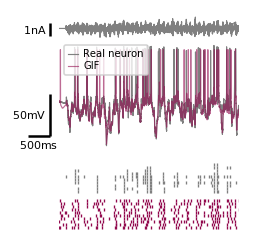

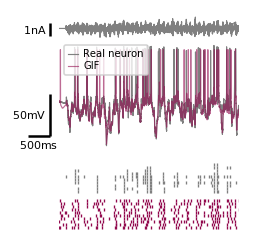

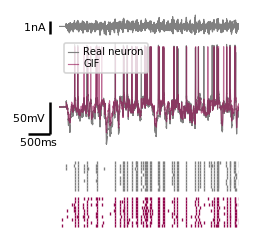

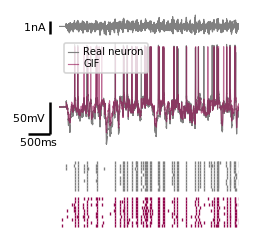

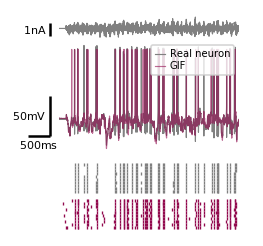

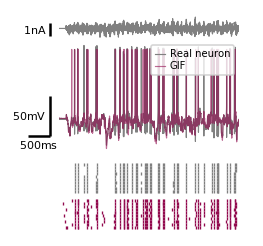

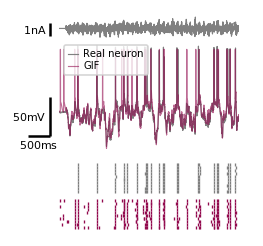

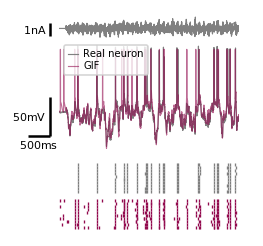

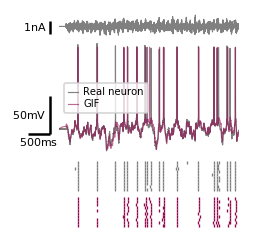

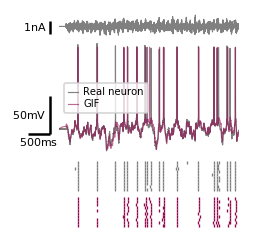

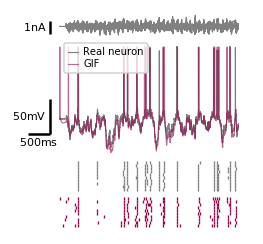

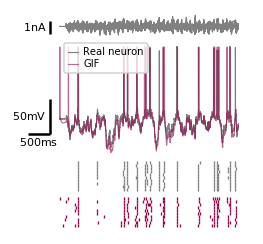

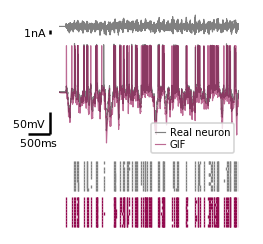

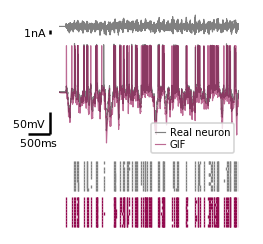

In [9]:
for i in range(sample_traces['mPFC'].shape[0]):
    sample_trace_plot(
        sample_traces['mPFC'], i, (0, 4000), 'mPFC_GIFs', 'GIF', colors['pyr'], colors['gif'], 
        current_scalebar_size=1, fname='{}_sample_trace_{}'.format('mPFC_GIFs', i)
    )

## GABA sample traces

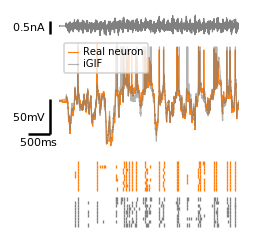

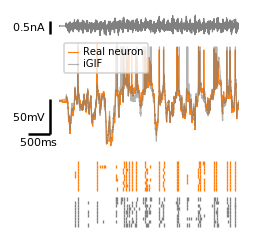

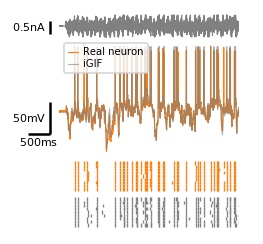

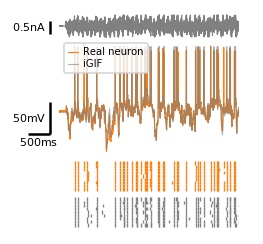

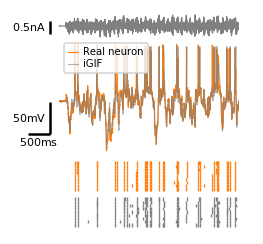

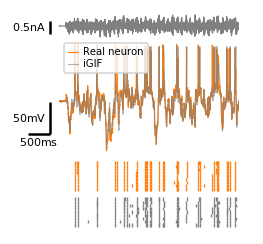

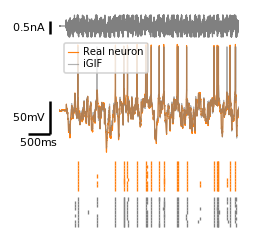

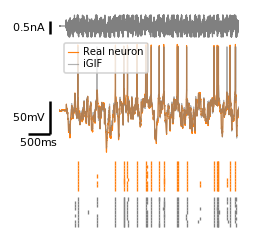

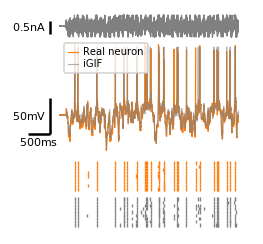

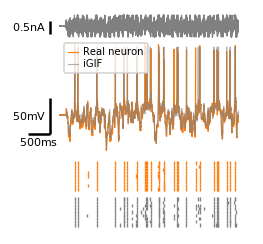

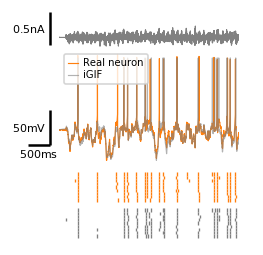

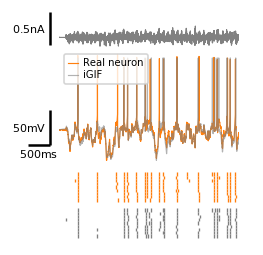

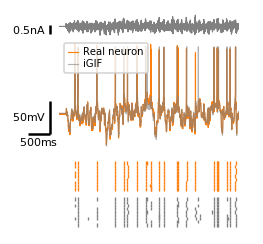

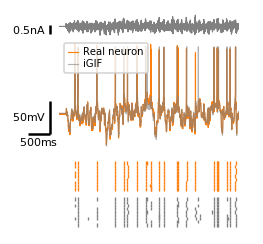

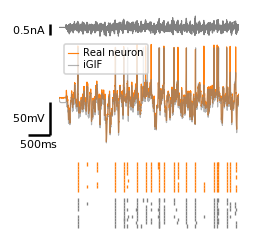

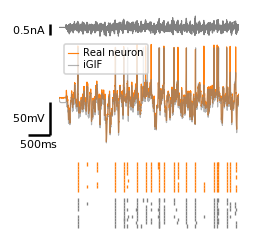

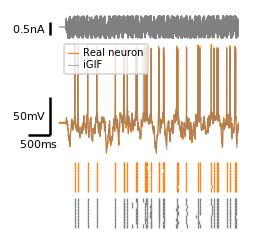

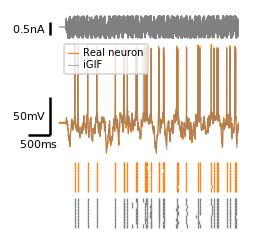

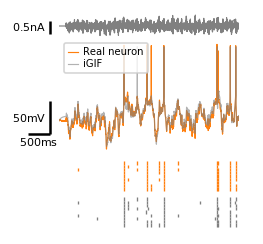

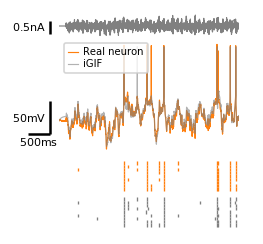

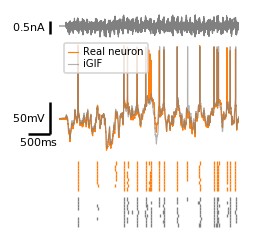

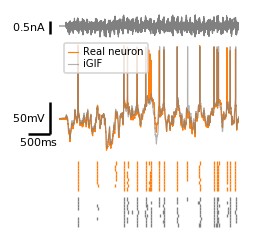

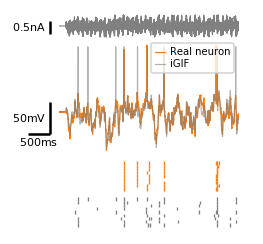

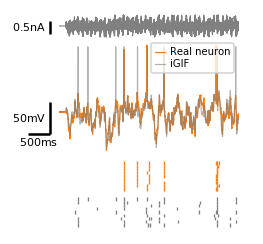

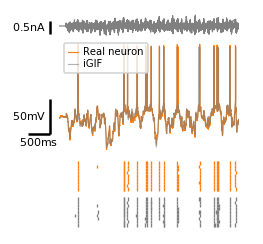

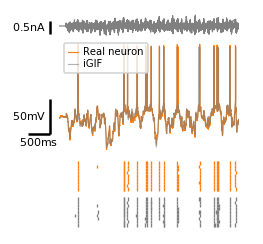

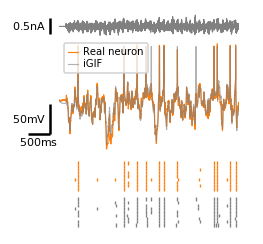

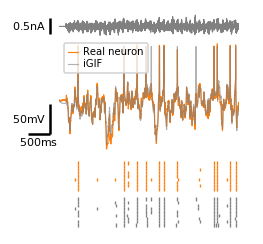

In [11]:
for i in range(sample_traces['GABA'].shape[0]):
    sample_trace_plot(
        sample_traces['GABA'], i, (0, 4000), 'GABA_iGIF_NPs', 'iGIF', colors['som'], colors['igif'], 
        current_scalebar_size=0.5, fname='{}_sample_trace_{}'.format('GABA_iGIFs', i)
    )

## 5-HT sample traces

Saving svg
Saving png
Done!


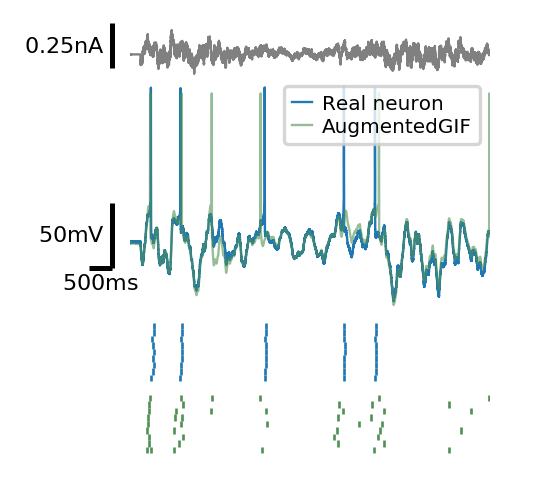

Saving svg
Saving png
Done!


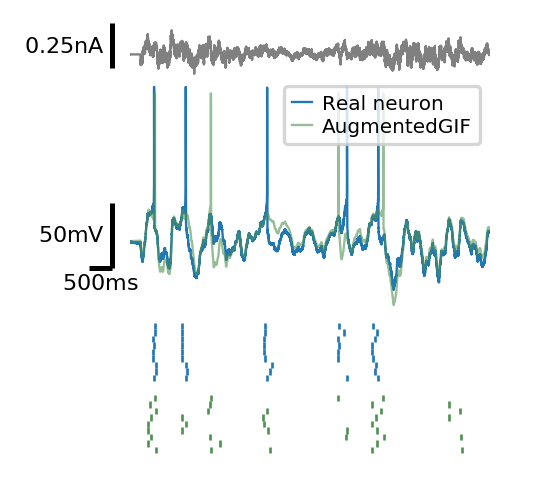

Saving svg
Saving png
Done!


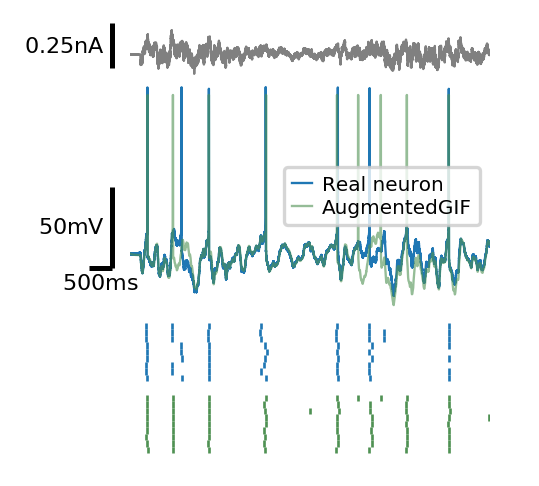

Saving svg
Saving png
Done!


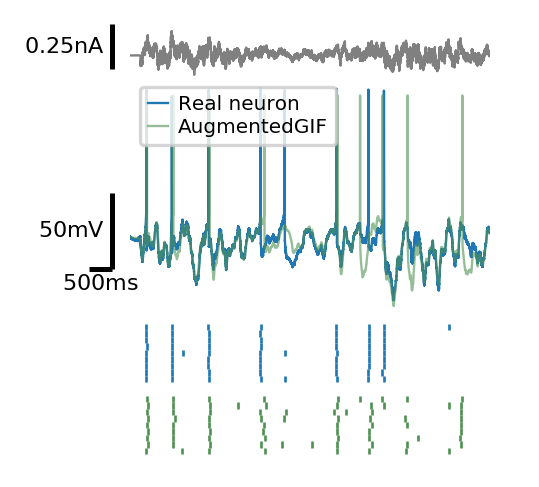

Saving svg
Saving png
Done!


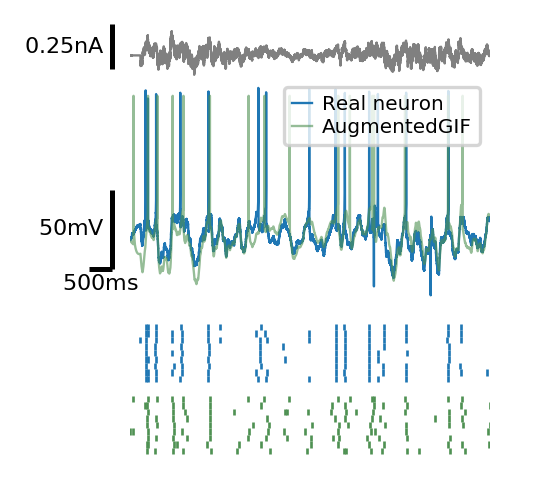

Saving svg
Saving png
Done!


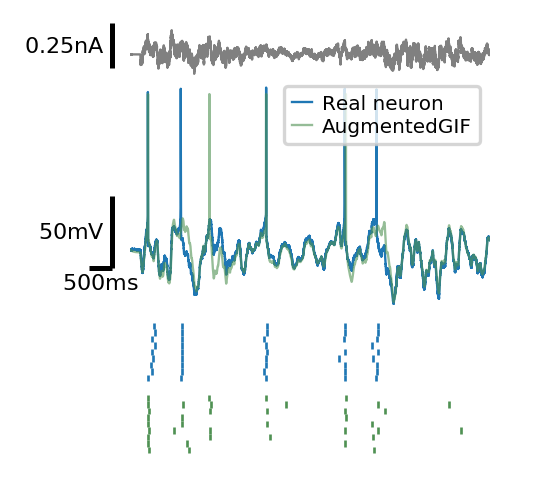

Saving svg
Saving png
Done!


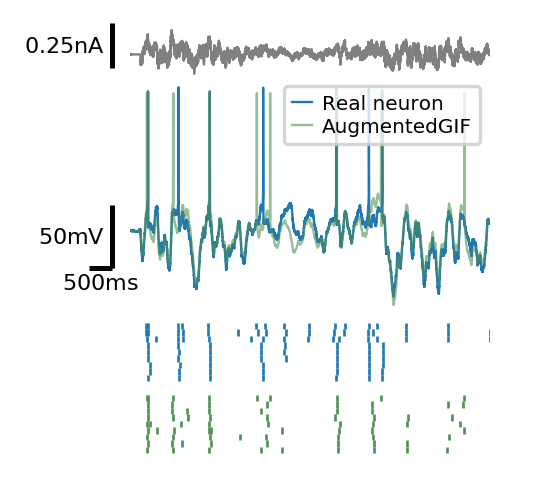

Saving svg
Saving png
Done!


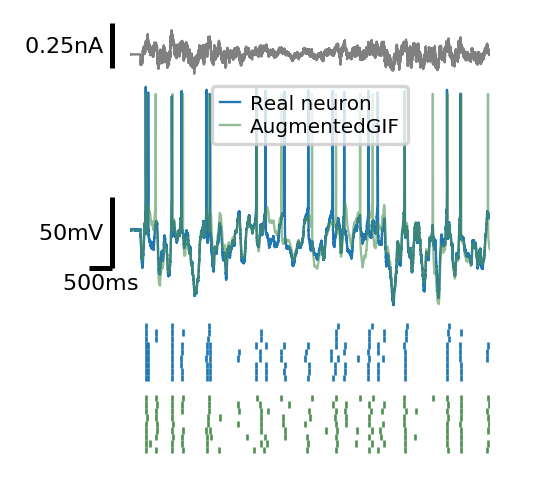

Saving svg
Saving png
Done!


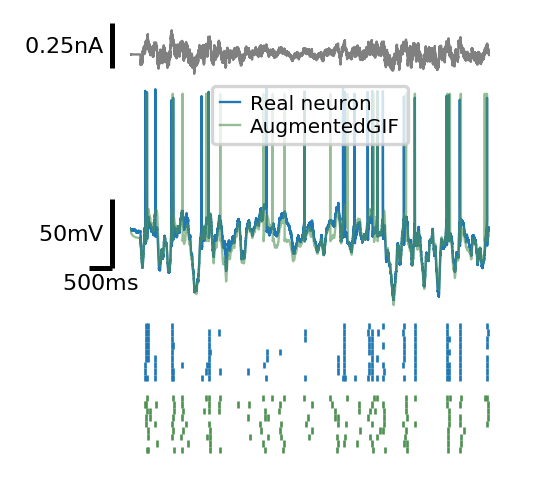

Saving svg
Saving png
Done!


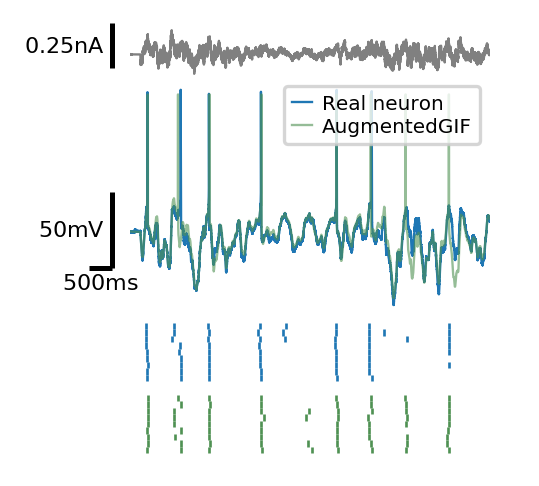

Saving svg
Saving png
Done!


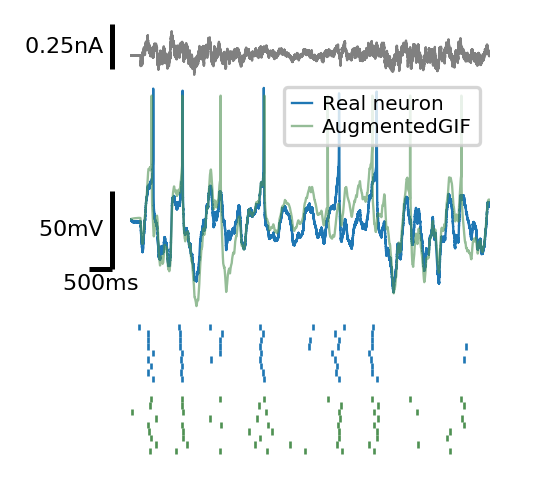

Saving svg
Saving png
Done!


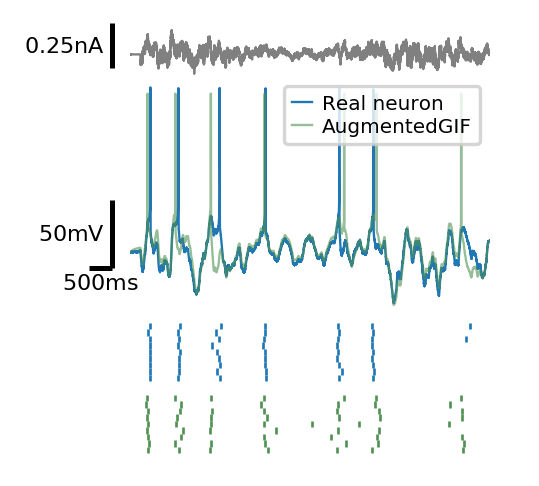

Saving svg
Saving png
Done!


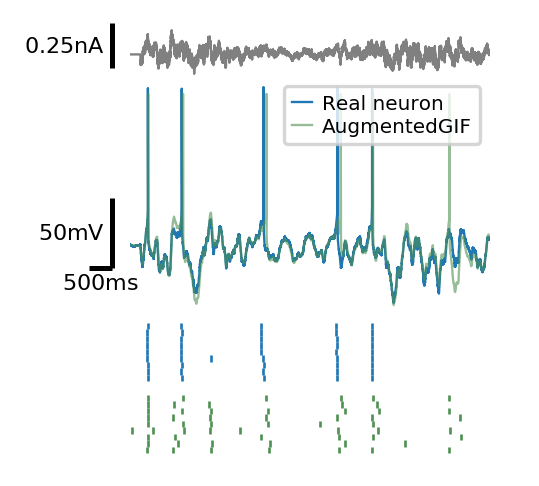

Saving svg
Saving png
Done!


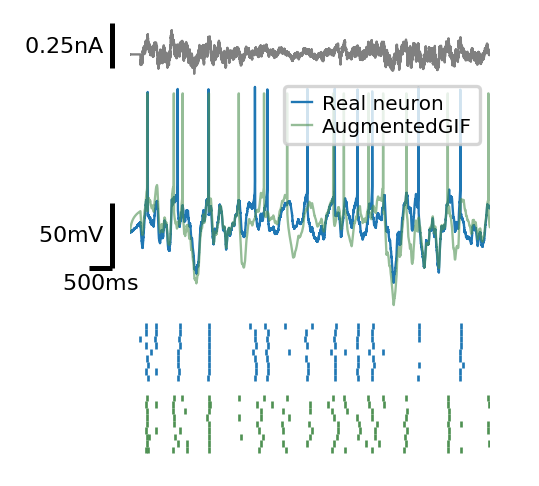

Saving svg
Saving png
Done!


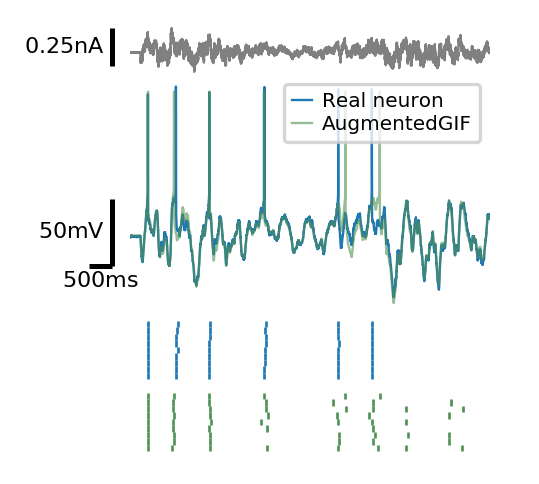

Saving svg
Saving png
Done!


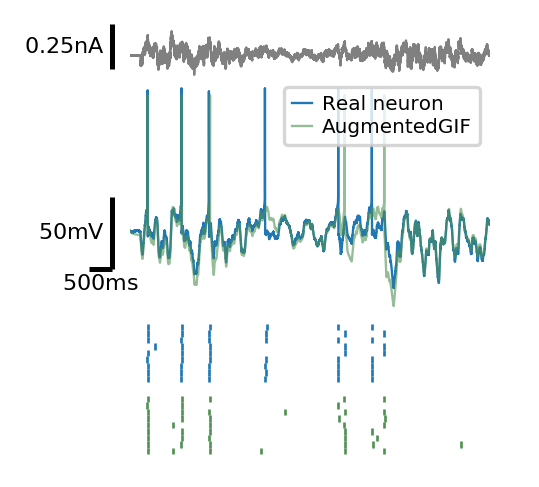

Saving svg
Saving png
Done!


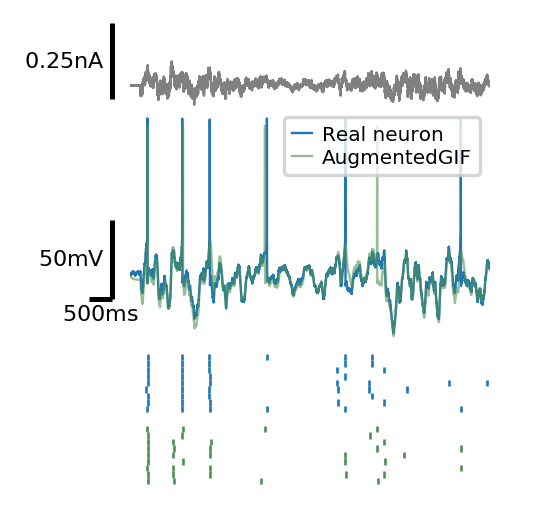

Saving svg
Saving png
Done!


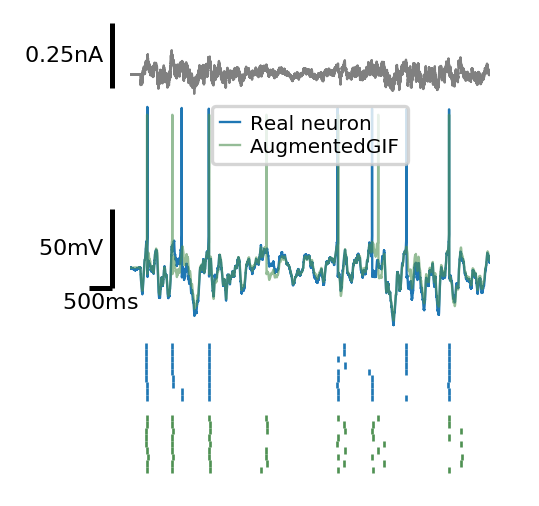

In [9]:
for i in range(sample_traces['5HT'].shape[0]):
    sample_trace_plot(
        sample_traces['5HT'], i, (0, 8000), '5HT_AugmentedGIFs', 'AugmentedGIF', colors['ser'], colors['agif'],
        current_scalebar_size=0.25, fname='{}_sample_trace_{}'.format('5HT_AugmentedGIFs', i)
    )

## 5-HT sample traces (29C to 30C)

Saving svg
Saving png
Done!


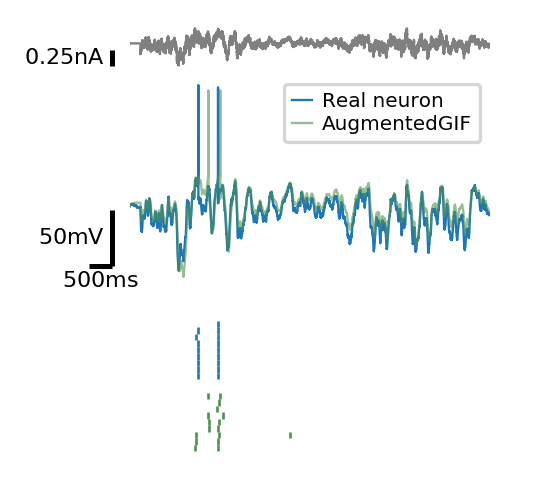

Saving svg
Saving png
Done!


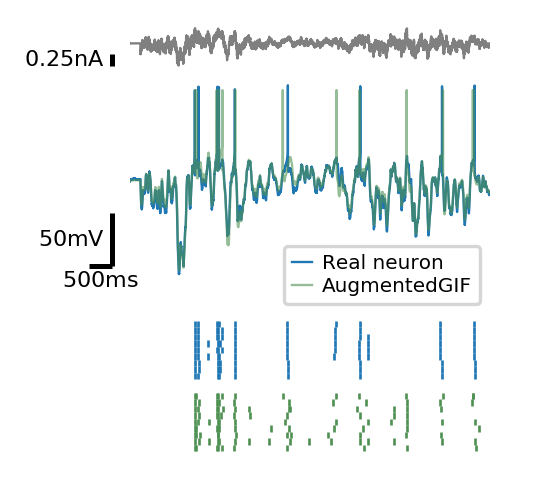

Saving svg
Saving png
Done!


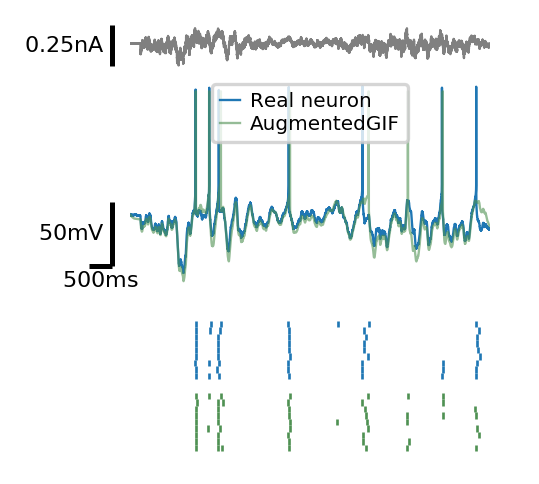

Saving svg
Saving png
Done!


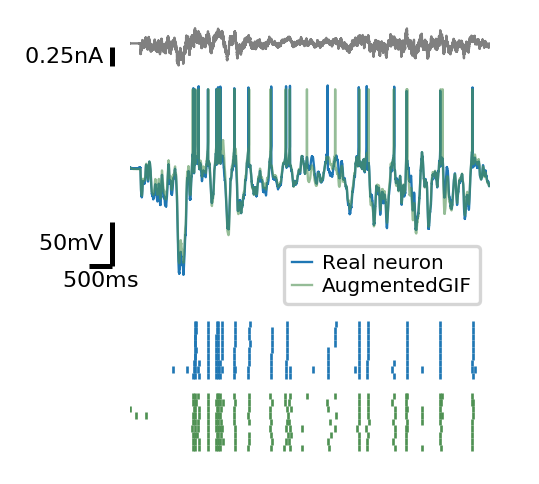

Saving svg
Saving png
Done!


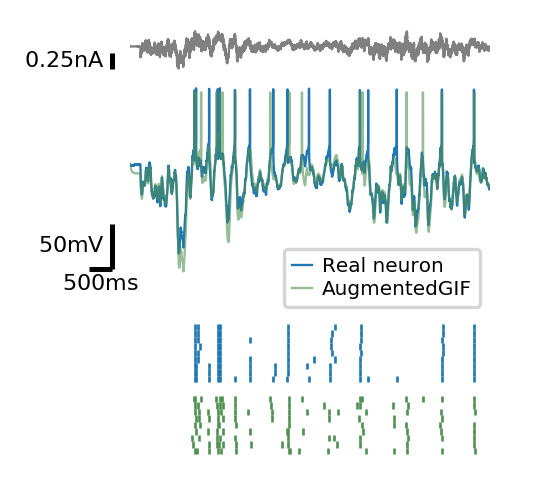

Saving svg
Saving png
Done!


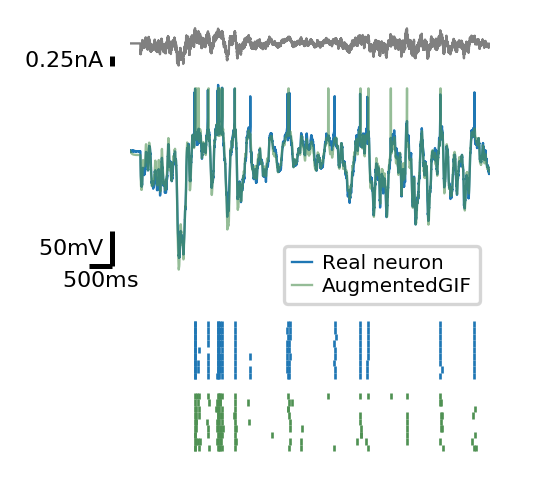

Saving svg
Saving png
Done!


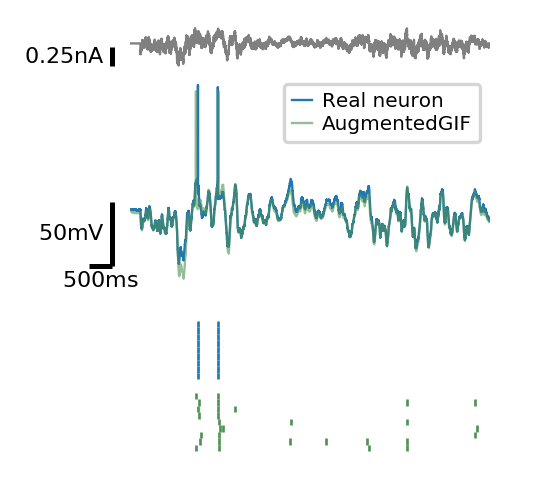

Saving svg
Saving png
Done!


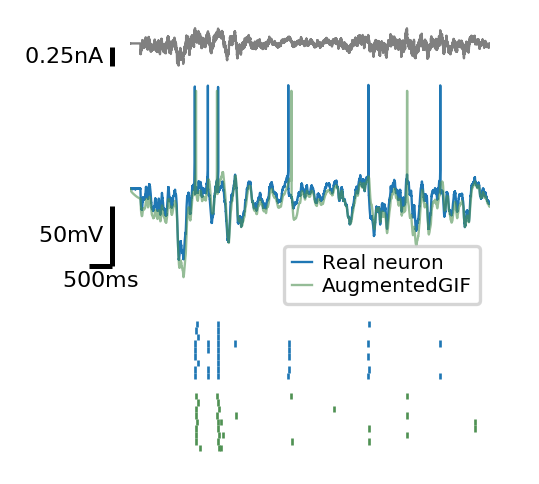

Saving svg
Saving png
Done!


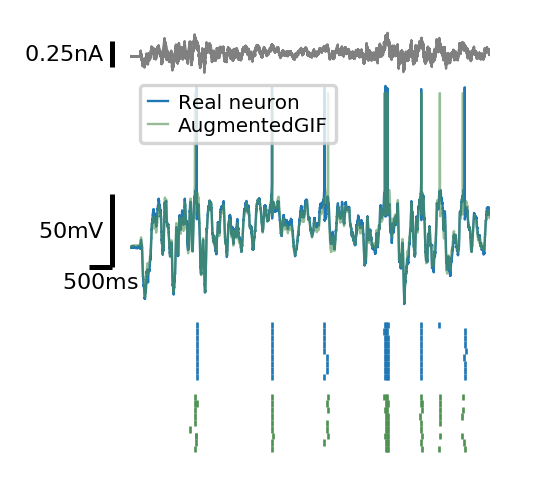

Saving svg
Saving png
Done!


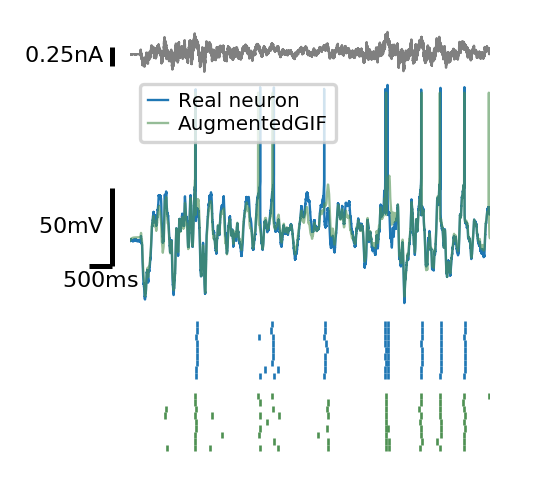

Saving svg
Saving png
Done!


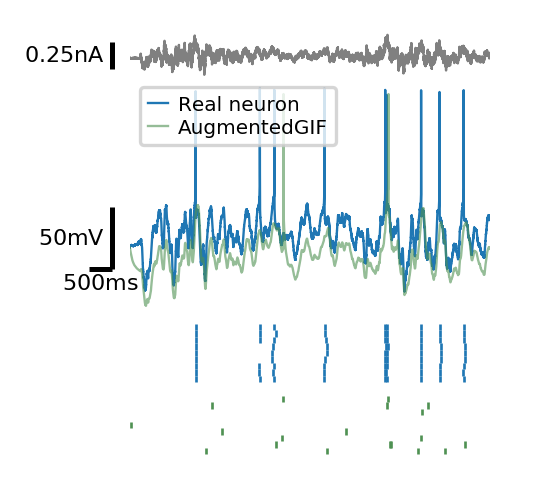

Saving svg
Saving png
Done!


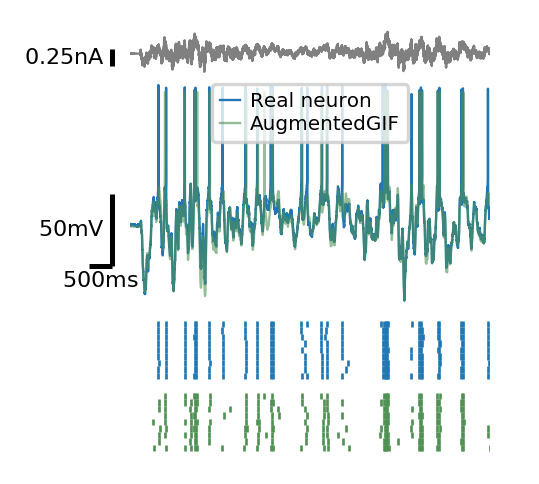

Saving svg
Saving png
Done!


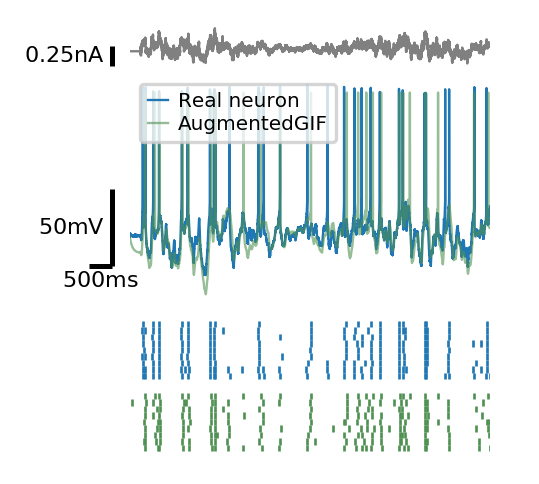

Saving svg
Saving png
Done!


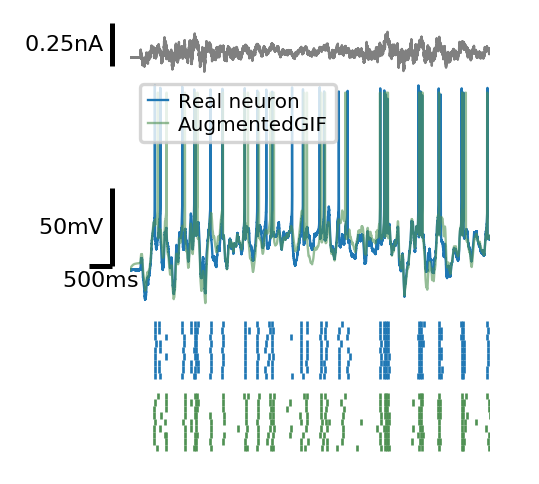

Saving svg
Saving png
Done!


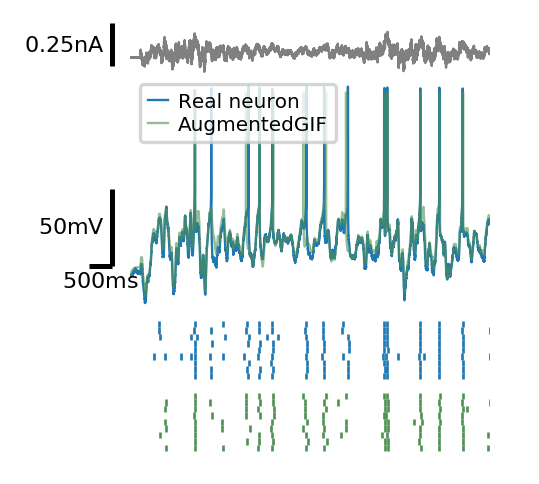

Saving svg
Saving png
Done!


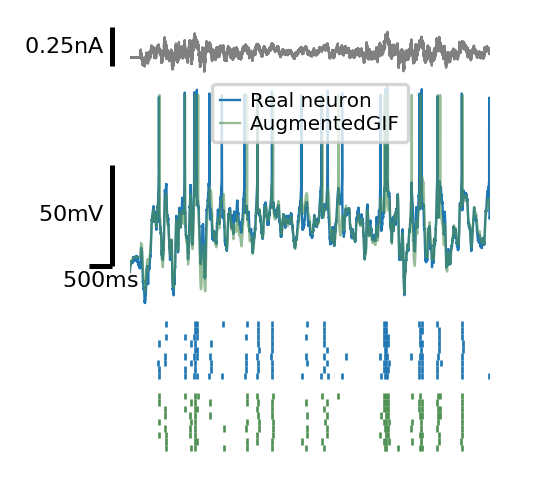

Saving svg
Saving png
Done!


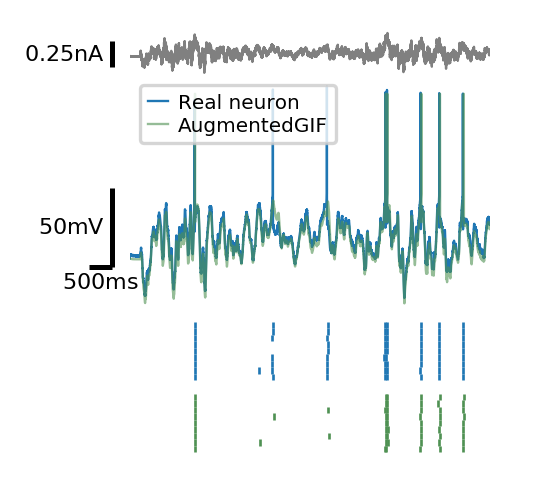

Saving svg
Saving png
Done!


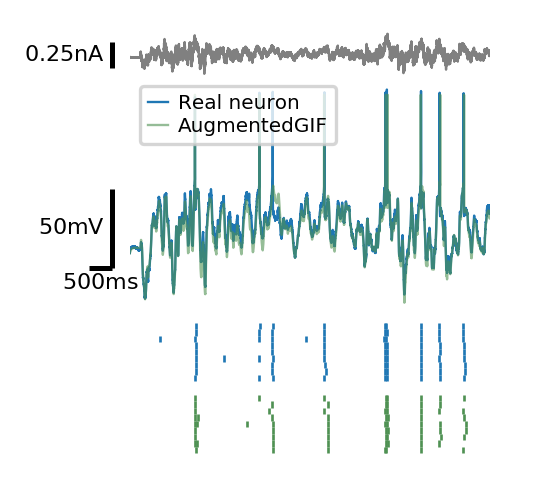

In [8]:
for i in range(sample_traces['5HT_heated'].shape[0]):
    sample_trace_plot(
        sample_traces['5HT_heated'], i, (0, 8000), '5HT_AugmentedGIFs', 'AugmentedGIF', colors['ser'], colors['agif'],
        current_scalebar_size=0.25, fname='{}_sample_trace_{}'.format('5HT_AugmentedGIFs_heated', i)
    )